## Statistical Thinking in Python 2

* [Parameter Estimation by Optimization](#estimate)
* [Bootstrap Confidence Intervals](#bootstrap)

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

sns.set()

### Parameter Estimation by Optimization <a class="anchor" id="estimate"/>
* Optimal Parameters
* Linear Regression
* EDA


In [13]:
# create a function to return CDF axis
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [83]:
# read all the data necessary
speed_of_light = pd.read_csv('datasets/speed_of_light.csv', index_col=0)
no_hitters = pd.read_csv('datasets/major_league_baseball_no_hitters.csv')
swing_states = pd.read_csv('datasets/swing_states.csv')
female_literacy = pd.read_csv('datasets/female_literacy.csv')

,0,1,2,3,4,5,6,7,8
0,875.5,648.2,788.1,940.3,491.1,743.5,730.1,686.5,NaN
1,878.8,865.6,654.9,831.5,798.1,681.8,743.8,689.1,NaN
2,752.1,837.2,710.6,749.2,967.1,701.2,619.0,747.6,NaN
3,803.4,645.6,804.1,787.4,646.8,997.1,774.0,734.5,NaN
4,835.0,840.7,659.6,828.3,909.7,856.9,578.3,904.2,NaN
5,883.9,740.1,773.9,741.4,866.8,871.1,712.5,919.2,NaN
6,927.9,809.4,633.8,626.8,871.3,774.3,898.8,789.6,NaN
7,936.3,765.4,882.1,681.1,661.3,847.9,683.9,985.7,NaN
8,771.1,736.6,713.2,774.5,937.7,694.5,598.2,983.8,NaN
9,700.2,901.3,733.5,964.4,609.3,1035.2,718.0,688.6,NaN


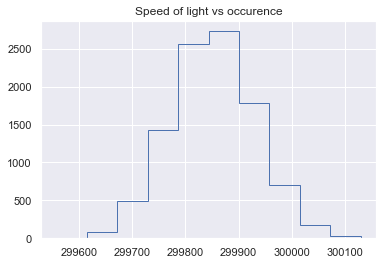

In [14]:
# checking nornmality
mean = np.mean(speed_of_light['velocity of light in air (km/s)'])
std = np.std(speed_of_light['velocity of light in air (km/s)'])
samples = np.random.normal(mean, std, size=10000)

plt.title('Speed of light vs occurence')
plt.hist(samples, histtype='step')
plt.show()

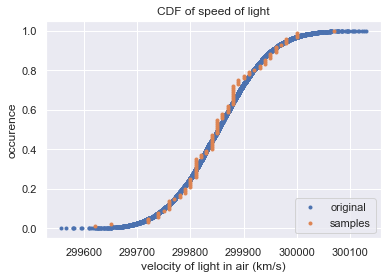

In [20]:
# show CDF 
x, y = ecdf(samples)
x_theor, y_theor = ecdf(speed_of_light['velocity of light in air (km/s)'])

plt.title('CDF of speed of light')
plt.plot(x, y, linestyle='none', marker='.', label='original')
plt.plot(x_theor, y_theor, linestyle='none', marker='.', label='samples')
plt.xlabel('velocity of light in air (km/s)')
plt.ylabel('occurence')
plt.legend(loc=4)
plt.show()

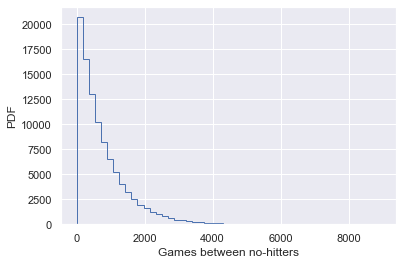

In [26]:
# no-hitters example
nohitter_times = np.array([843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, size=100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

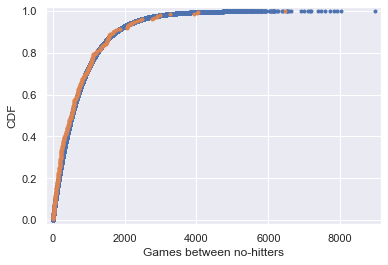

In [27]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

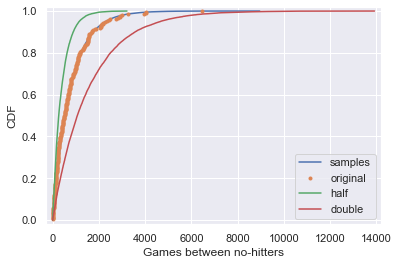

In [29]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor, label='samples')
plt.plot(x, y, marker='.', linestyle='none', label='original')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau / 2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau * 2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, label='half')
_ = plt.plot(x_double, y_double, label='double')

# Show the plot
plt.legend(loc=4)
plt.show()

In [41]:
# show slope and intercept
total_votes = swing_states['total_votes']
dem_share = swing_states['dem_share']

slope, intercept = np.polyfit(total_votes, dem_share, 1)
print(f'Slope: {round(slope, 5)}, Intercept: {round(intercept, 3)}')

Slope: 4e-05, Intercept: 40.114


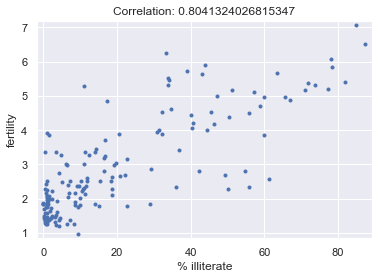

In [48]:
# show the regression and pearson correlation 
literacy = female_literacy['female literacy']    # get the literacy column and take its inverse
illiteracy = np.abs(literacy - 100)

fertility = female_literacy['fertility']         # get fertility column
corr = np.corrcoef(illiteracy, fertility)[0, 1]  # get the correlation coefficient 

# show correlation and plot 
plt.title(f'Correlation: {corr}')
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02) # set margins
plt.xlabel('% illiterate')
plt.ylabel('fertility')
plt.show()

slope = 0.049798548090634255 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


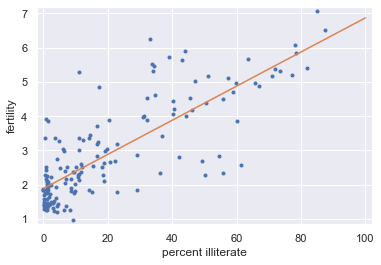

In [49]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


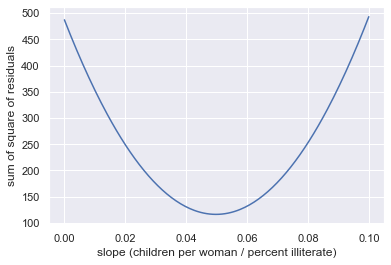

In [50]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

## Bootstrap Confidence Intervals <a class="anchor" id="bootstrap"/>
* Generate bootstrap replicates
* Visualizing samples
* Confidence interval
* Pairs bootstrap

---

- bootstrap sample = array of length *n* that was drawn from the original data **with** replacement
- bootstrap replicate = a single value of a statistic computed from a bootstrap sample

In [56]:
# generate bootstrap replicates using numpy
samples = np.random.choice(speed_of_light['velocity of light in air (km/s)'], size=100)
np.mean(samples), np.std(samples), np.median(samples)

(299844.6, 81.57720269781258, 299840.0)

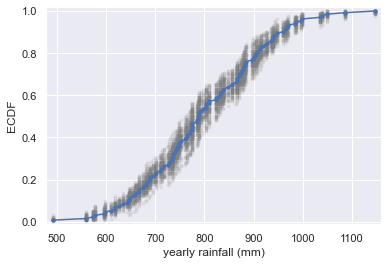

In [84]:
# visualizing samples
rainfall = np.array([
        875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793.])

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

**Bootstrap confidence intervals**


In [87]:
# create a helper function to generate bootstrap replicate of 1D data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, len(data)))

# draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(speed_of_light['velocity of light in air (km/s)'], np.mean)

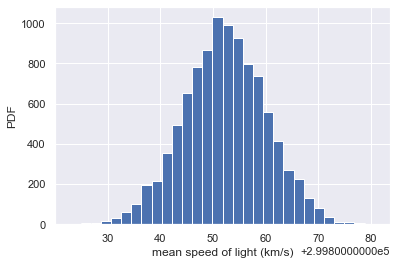

In [86]:
# plot a histogram
_ = plt.hist(bs_replicates, bins=30)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

**Confidence Interval**
If we repeat measurements over and over again, p% of the observed values would lie within the p% confidence interval.

10.510549150506188
10.488551974010678


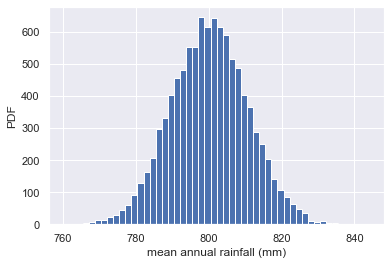

In [89]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print standard error of the mean
sem =  np.std(rainfall)/ np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [90]:
# 95th confidence:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.70274436, 820.83652256])

95% confidence interval = [664.18984064 869.96912351] games


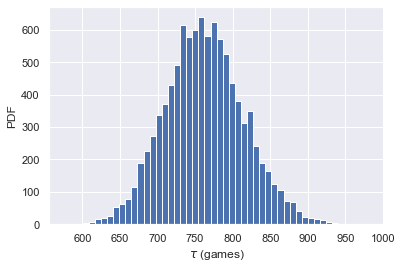

In [92]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

**Pairs bootstrap** => resampling data in pairs<br>
Idea:
```
    # create sequential indices
    indices = np.arange(...)              
    
    # sample a specific index
    bs_ind = np.random.choice(indices, len(indices))   

    bs_x = X[bs_ind]     # take a specific index from total votes
    bs_y = Y[bs_ind]     # take a specific index from dem share 
    
    # get slope and intercepts
    bs_slope, bs_intercept = np.polyfit(bs_x, bs_y, 1)
```

In [94]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


[0.04384021 0.054958  ]


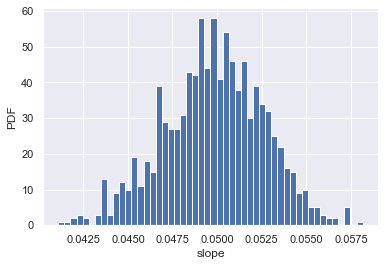

In [95]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

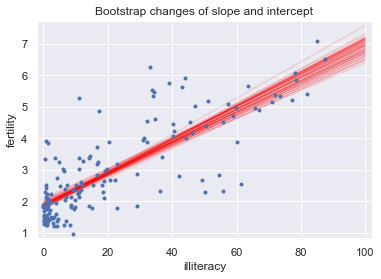

In [97]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
plt.title('Bootstrap changes of slope and intercept')
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()